### Business Problem 

- Schuster is a multinational retail company specializing in sports goods and accessories, engaging in substantial business with numerous vendors under credit arrangements. However, some vendors fail to adhere to payment terms, leading to late payments. While Schuster imposes significant late fees, this approach is detrimental to long-term relationships. Employees spend time chasing late payments, resulting in non-value-added activities and financial costs. Schuster aims to analyze customer payment behavior and predict the likelihood of late payments on open invoices.

- Whenever a transaction occurs, the accounting team generates an invoice detailing the goods, invoice value, creation date, and payment due date per the contract's credit terms. Given the frequency of transactions, multiple invoices are active for each vendor at any time.

### Goal of the Case Study

- The company seeks to understand customer payment behavior through historical patterns and segmentation. It aims to predict the likelihood of delayed payments on open invoices, enabling collectors to prioritize follow-ups and secure timely payments.

### Methodology Followed

- The solution notebook is divided in to below steps and section -

    - Step 1 : Importing the warnings and required libraries
    - Step 2 : Reading and Cleaning both the datasets for smooth processing
    - Step 3 : Visualizing the structured data using basic EDA   
    - Step 4 : Feature Engineering for both the datasets including Dummification
    - Step 5 : Clustering - Finding out the customer segmentation
    - Step 6 : Data Handling for Model building & Train-Test Split
    - Step 7 : Multiple Model Building,Testing and Predicting
    - Step 8 : Summary of prediction on Customers_name and Visualization
    - Step 9 : Conclusion/Recomendation

# Step 1 : Importing the warnings and required libraries

In [338]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Step 2 : Reading and Cleaning both the datasets for smooth processing

In [3]:
# Reading the first dataset
rec_pay_data = pd.read_csv('Received_Payments_Data.csv')
rec_pay_data.head(2)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [5]:
rec_pay_data.shape

(93937, 16)

In [7]:
rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [9]:
rec_pay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [11]:
#Checking the missing data

rec_pay_data.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [13]:
#Checking the percentage of missing data (No. of Missing data rows in the column/Total number of rows*100)

(29/93937)*100

0.030871754473743043

- Only 0.03% of data in the "RECIEPT_DOC_NO" column is missing, making it largely unhelpful for analysis. We can drop this column and proceed.

In [15]:
# Dropping the "RECEIPT_DOC_NO" column
rec_pay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

# Checking the dataset post dropping
rec_pay_data.head(2)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [17]:
#Converting the date columns to datetime for easy understanding

date_columns = ['RECEIPT_DATE', 'INVOICE_CREATION_DATE', 'DUE_DATE']
rec_pay_data[date_columns] = rec_pay_data[date_columns].apply(pd.to_datetime)

In [19]:
#Rechecking the dataset

rec_pay_data.head(2)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods


In [21]:
#Quick sanity check for the columns present in the dataset 

rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

- Creating the target column 'default' so that we can move on with the objective to understand the default payment demographics

In [23]:
rec_pay_data['default'] = (rec_pay_data["RECEIPT_DATE"] > rec_pay_data["DUE_DATE"]).astype(int)
rec_pay_data.default.value_counts()

default
1    61978
0    31959
Name: count, dtype: int64

In [25]:
# Checking an overall percentage of default paymets 

rec_pay_data.default.value_counts(normalize=True)

default
1    0.659783
0    0.340217
Name: proportion, dtype: float64

### Reading the second dataset

In [28]:
# Reading the second data set 

open_data = pd.read_csv("Open_Invoice_data.csv", encoding='ISO-8859-1')
open_data.head(2)

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09


In [30]:
open_data.shape

(88204, 14)

In [32]:
# Removing non required columns which arent present in the first dataset.

open_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [34]:
open_data.columns

Index(['Customer_Name', 'Payment Term', 'Due Date', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [36]:
#Rechecking the dataset 

open_data.head(2)

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09


In [38]:
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [40]:
#Checking for any missing value 

open_data.isnull().sum()

Customer_Name        0
Payment Term         0
Due Date             0
Transaction Class    0
AGE                  0
USD Amount           0
INV_CREATION_DATE    0
dtype: int64

- We can see that there are no null values in the dataset, so we can proceed with the further cleaning 

In [42]:
#Converting the date columns to datetime for easy understanding

open_data[['Due Date', 'INV_CREATION_DATE']] = open_data[['Due Date', 'INV_CREATION_DATE']].apply(pd.to_datetime)

In [44]:
open_data.head(2)

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,2021-12-21,CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00
1,AL J Corp,30 Days from Inv Date,2022-03-03,INVOICE,33,"2,000",2022-02-01 14:09:00


In [46]:
#Changing the format of the USD currency 

open_data['USD Amount'] = open_data['USD Amount'].str.replace(",", "").astype(int)

In [48]:
open_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

- We can see that there are negative values, we can drop the negative and the zero values in order to make the dataset more concise

In [50]:
# Keeping the values above 0 for USD Amount column

open_data = open_data[open_data['USD Amount']>=0]

In [52]:
open_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79780 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79780 non-null  object        
 1   Payment Term       79780 non-null  object        
 2   Due Date           79780 non-null  datetime64[ns]
 3   Transaction Class  79780 non-null  object        
 4   AGE                79780 non-null  int64         
 5   USD Amount         79780 non-null  int32         
 6   INV_CREATION_DATE  79780 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.6+ MB


#### We can conclude that both the datasets are clean and ready for next step now, i.e. EDA

# Step 3 : Visualizing the structured data using basic EDA

- We will try to do basic EDA for both the Recieved Payment Data set and Open Invoices Data set

In [54]:
rec_pay_data.head(2)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1


In [56]:
# Categorical Columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']

# Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

### Analysing the Numerical Columns - Recieved Payments Dataset

In [58]:
# Understanding the'Local Amount' colums
rec_pay_data['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

In [60]:
# Checking the number of bills with Local Amount equal to 0
rec_pay_data[rec_pay_data['Local Amount'] == 0].shape

(1126, 16)

- We can drop the 1126 rows as they have 0 amount, so that the data set is much more concise. 

In [62]:
# Dropping the rows with 'Local Amount' = 0
rec_pay_data = rec_pay_data[rec_pay_data['Local Amount'] > 0]

# Checking the shape again
rec_pay_data.shape

(92811, 16)

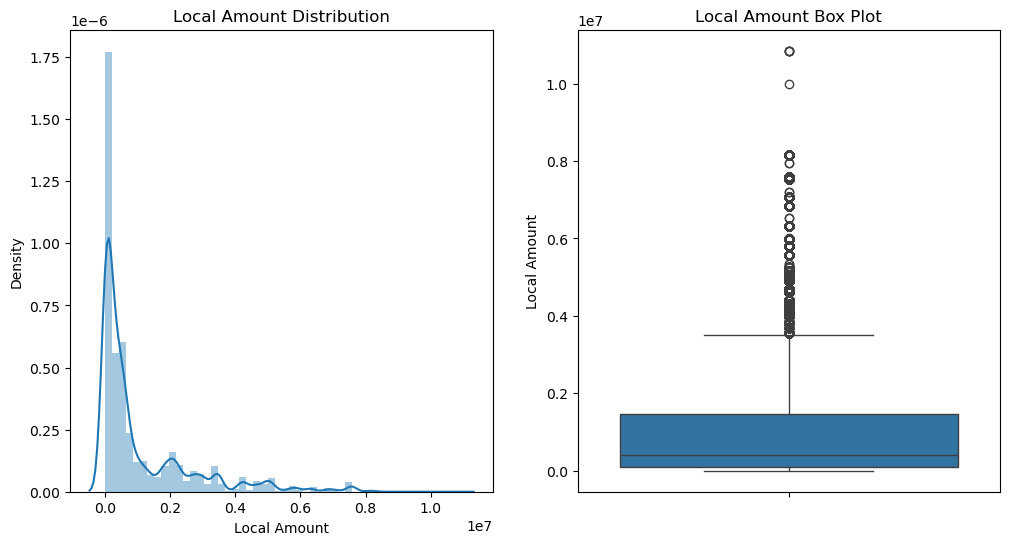

In [64]:
# Visualizing the distribution of 'Local Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['Local Amount'])
plt.title("Local Amount Box Plot")

plt.show()

- Dropping the 'Local Amount' column since it lacks a single currency value, while the 'USD Amount' column serves for the bill amount.

In [65]:
# Dropping the 'Local Amount' column
rec_pay_data.drop('Local Amount', axis=1, inplace=True)

# Checking the head of data
rec_pay_data.head(2)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1


In [68]:
# Visualizing the'USD Amount' column

rec_pay_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

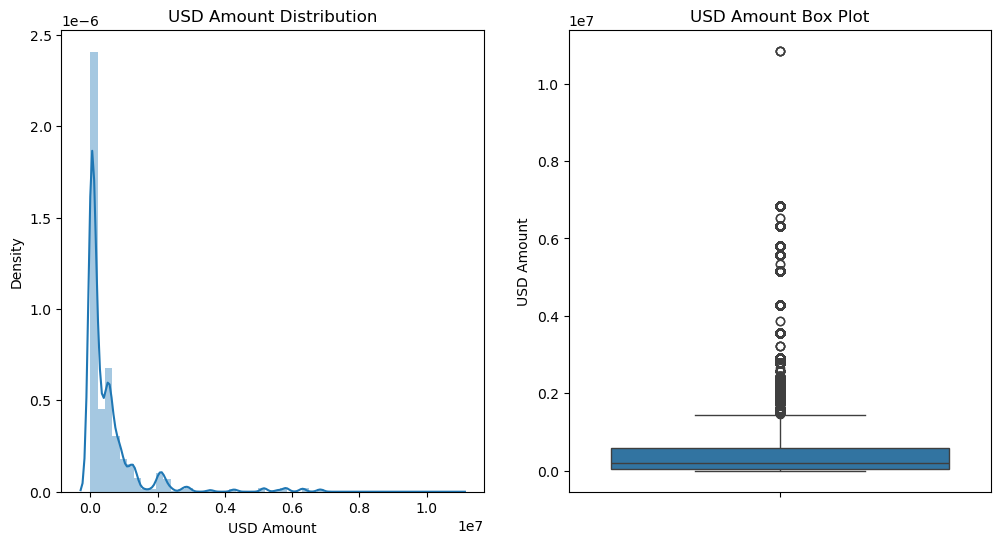

In [70]:
# Visualizing the distribution of 'USD Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(rec_pay_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()

INSIGHT - 

- Highly Skewed Distribution: The USD amount is highly right-skewed, with most transactions concentrated at lower values, indicating that small transactions dominate.

- Presence of Outliers: The box plot reveals numerous outliers (values far beyond the whiskers), suggesting the existence of very high transaction amounts that deviate significantly from the majority.

- Tight Spread for Majority: The box plot shows a compact interquartile range (IQR), meaning most transactions fall within a narrow band of values, while a few extreme values inflate the range.

### Analysing the Categorical Columns - Recieved Payments Dataset

In [115]:
##cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE','RECEIPT_METHOD']

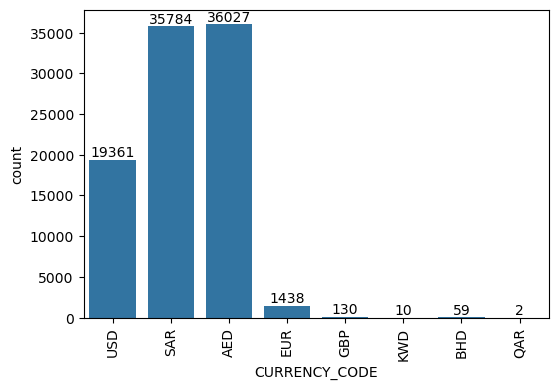

In [72]:
#Visualizing Currency code Column

plt.figure(figsize=(6,4))
ax = sns.countplot(data=rec_pay_data, x='CURRENCY_CODE')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- We can see that the Top3 currency used for payments is AED,SAR and USD. By that we can understand the demographic of the vendors, majority of the vendors are from the Middle East

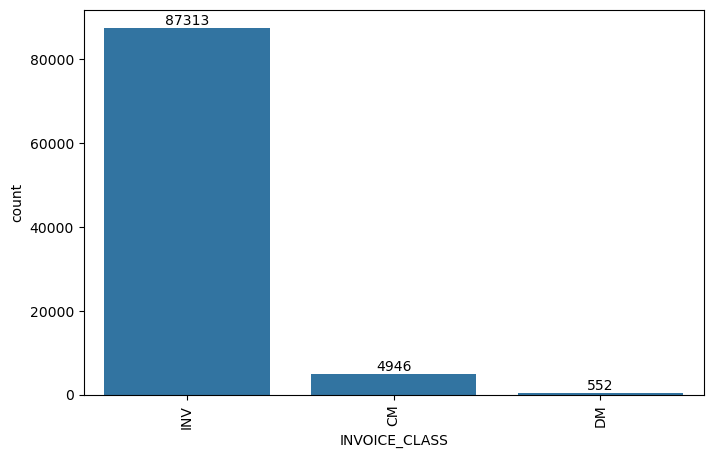

In [74]:
#Visualizing the invoice class column

# Visualising the column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=rec_pay_data, x='INVOICE_CLASS')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- As mentioned earlier we can see that the majority of the vendors have raised Invoices, followed by Credit Memo and Debit Memo.

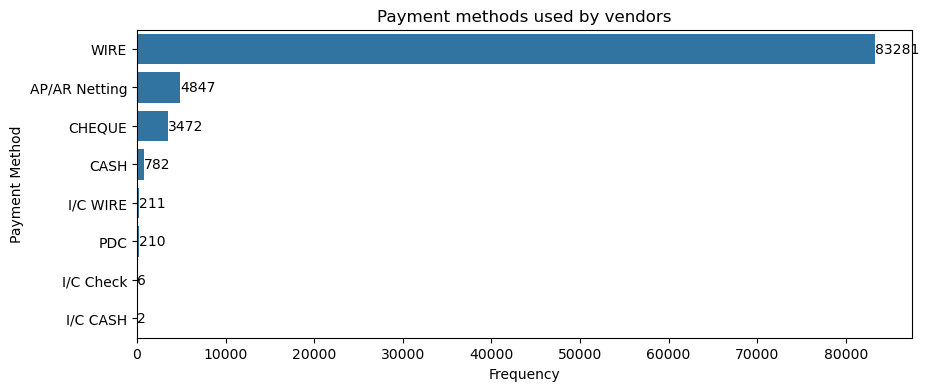

In [76]:
# Visualising the the recipt method column for understanding the business
plt.figure(figsize=(10,4))

ax = sns.countplot(data=rec_pay_data, y='RECEIPT_METHOD', order=rec_pay_data['RECEIPT_METHOD'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")

plt.show()

- The preferred mode of payment is WIRE rather than other methods

In [78]:
#Reading the Open Invoice dataset

open_data.head(2)

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
1,AL J Corp,30 Days from Inv Date,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00
2,AL J Corp,30 Days from Inv Date,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00


### Analysing the Numerical Columns - Open Invoice Dataset

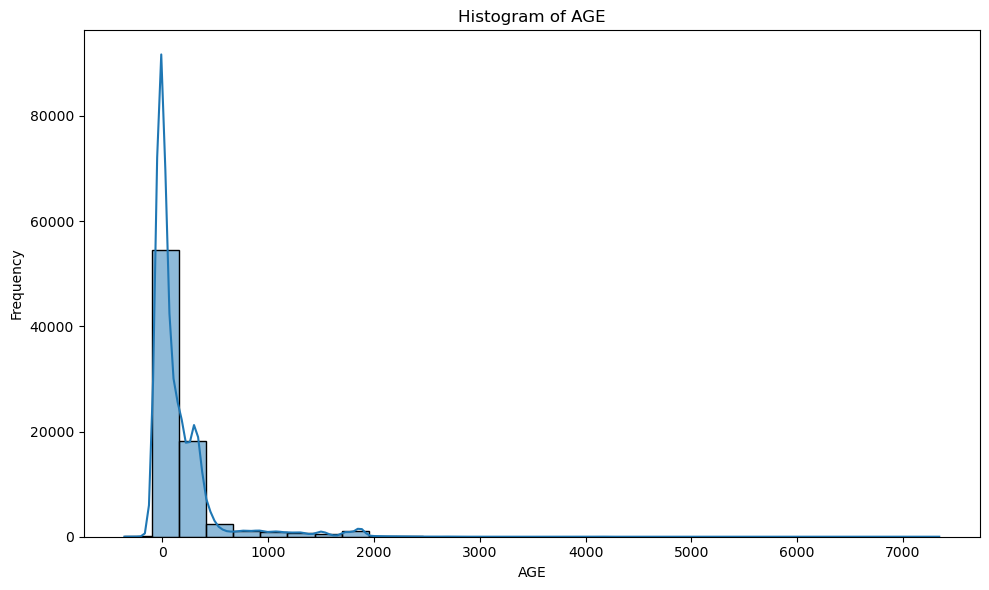

In [80]:
# Get the value counts of AGE
age_counts = open_data['AGE'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(open_data['AGE'], bins=30, kde=True)
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- We can see that the dataset is huge and the distribution of age is very flattened.

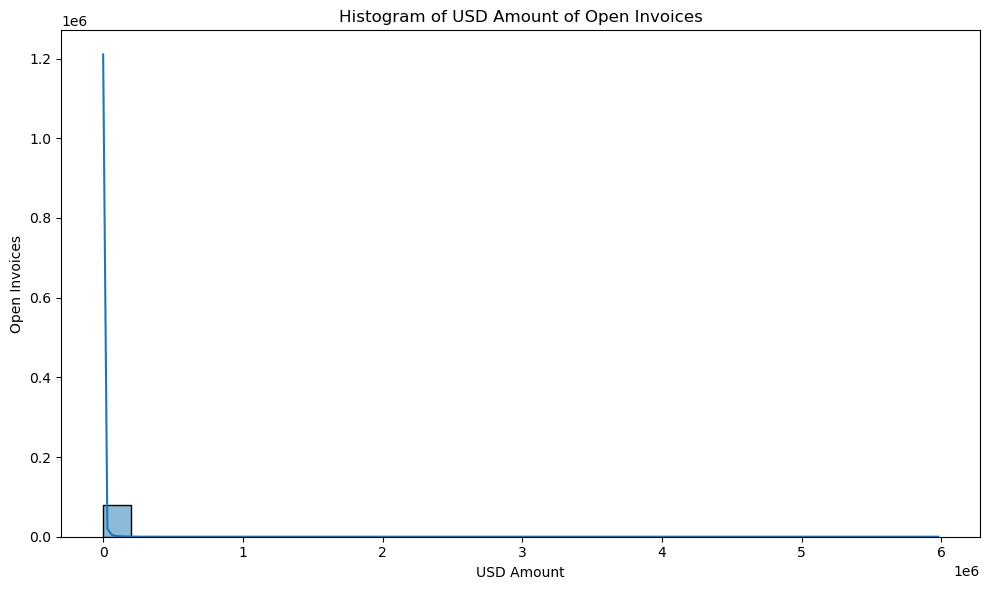

In [82]:
# Get the value counts of USD
age_counts = open_data['USD Amount'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(open_data['USD Amount'], bins=30, kde=True)
plt.title('Histogram of USD Amount of Open Invoices')
plt.xlabel('USD Amount')
plt.ylabel('Open Invoices')
plt.tight_layout()
plt.show()

- The volume of open invoices is high.

### Analysing the Categorical Columns - Open Invoice Dataset

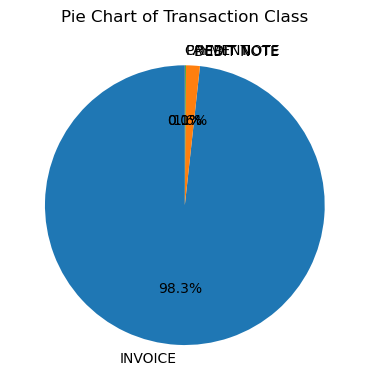

In [84]:
# Getting the value counts of 'Transaction Class'
transaction_class_counts = open_data['Transaction Class'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4,4))
transaction_class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Transaction Class')
plt.ylabel('')  # Hide the y-label as it's not necessary for a pie chart
plt.tight_layout()
plt.show()

- We can see that majority of open invoices are from the vendors who have raised the 'Invoice'

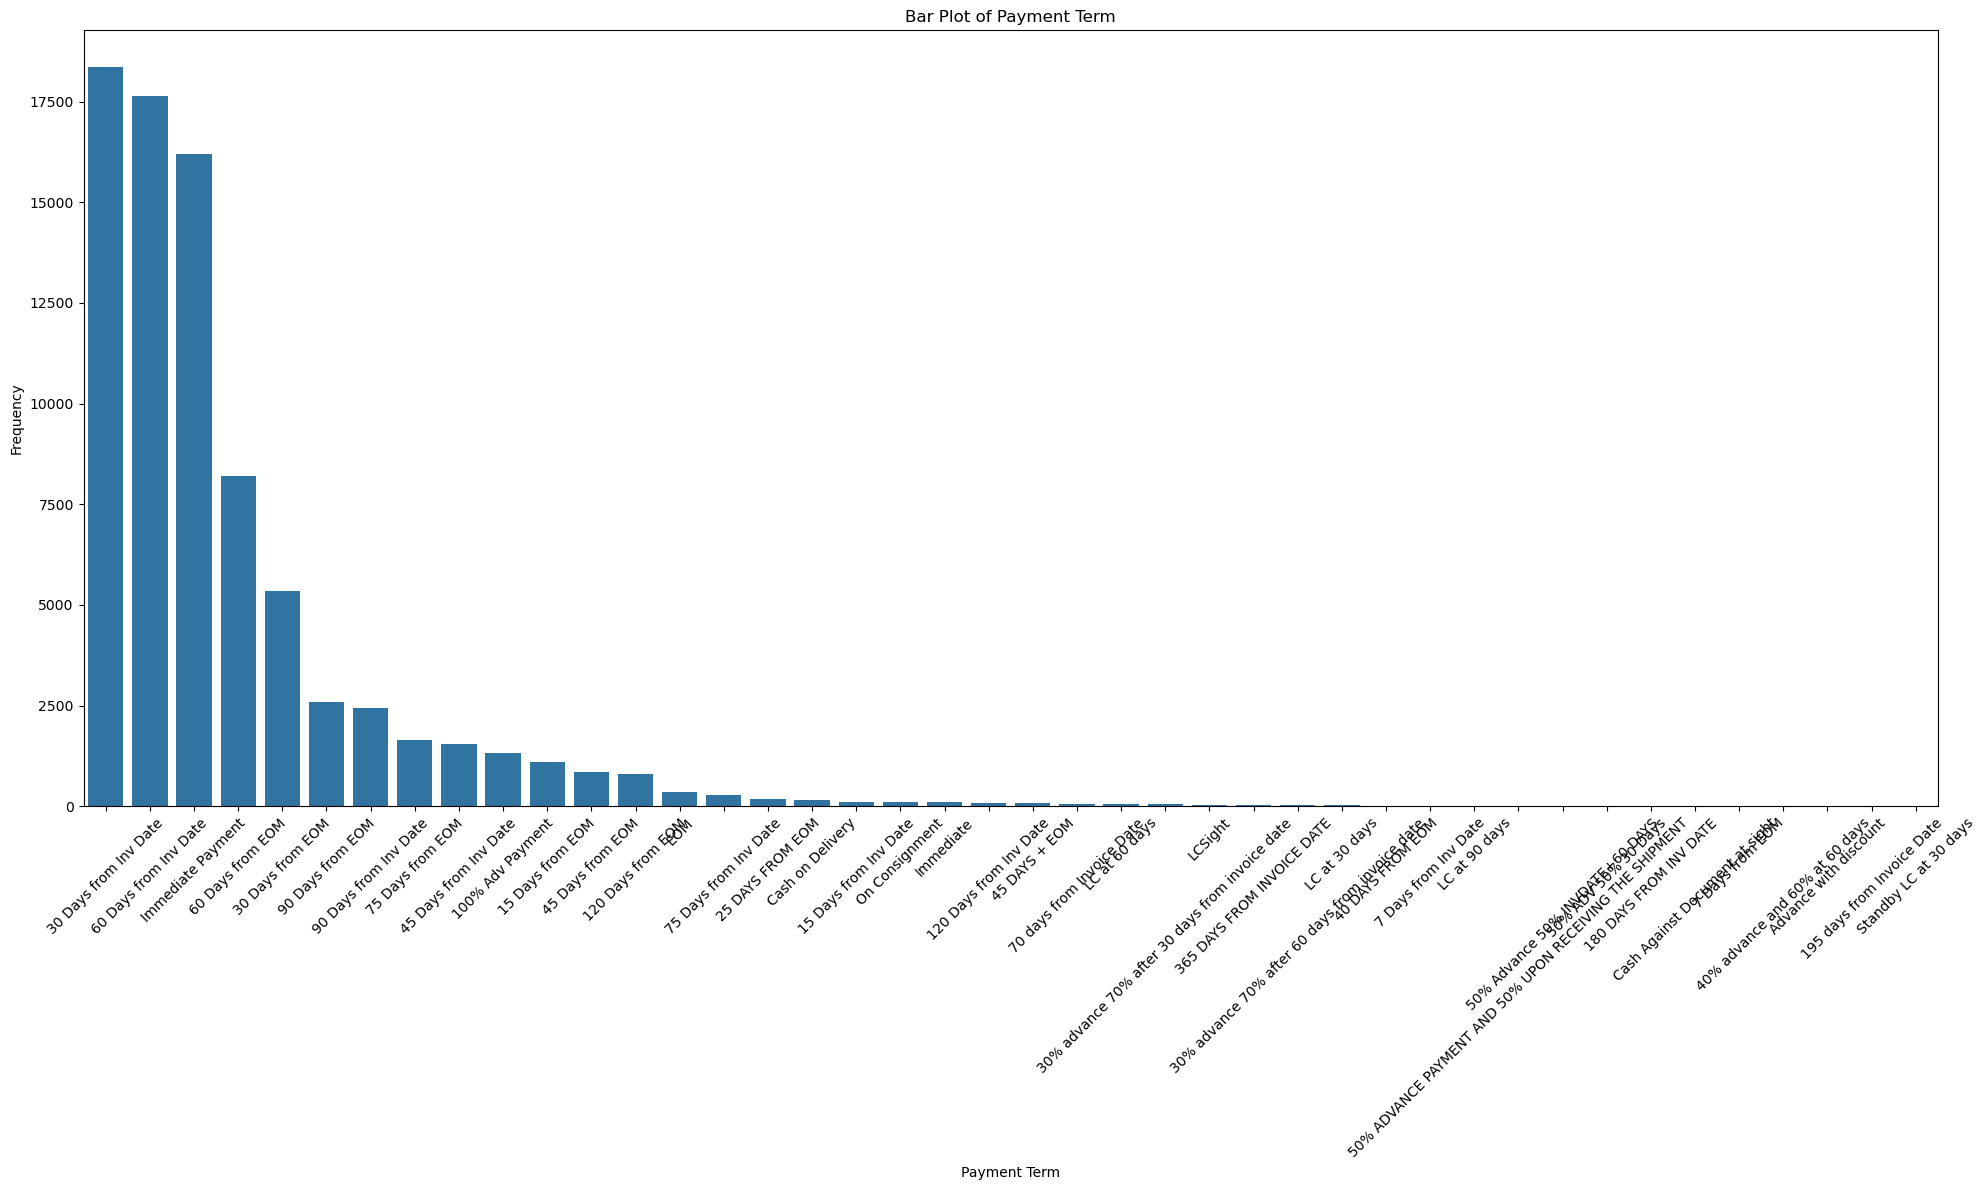

In [86]:
# Getting the value counts of 'Payment Term'
payment_term_counts = open_data['Payment Term'].value_counts()

# Plot a bar plot
plt.figure(figsize=(20, 12))
sns.barplot(x=payment_term_counts.index, y=payment_term_counts.values)
plt.title('Bar Plot of Payment Term')
plt.xlabel('Payment Term')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

- The highest invoices are open for a month and so on. 

# Step 4 : Feature Engineering for both the datasets including Dummification

### Recieving Payment Dataset 

In [88]:
rec_pay_data.head(2)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1


In [90]:
### PAYMENT_TERM column

# Using cumsum() function to get cummulative sum on value_counts()

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date              

In [92]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                     

- Approximately 95% of the data is represented by 10 values, so we will group the remaining values as "others" in both datasets.

In [94]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
rec_pay_data['PAYMENT_TERM'] = rec_pay_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

rec_pay_data['PAYMENT_TERM'].value_counts() # Sanity Check

PAYMENT_TERM
60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

#### Dummy Variable

In [96]:
# Creating dummy variables for the 'PAYMENT_TERM' column

term_dummies= pd.get_dummies(rec_pay_data['PAYMENT_TERM']).drop('others', axis=1).astype(int)

rec_pay_data = rec_pay_data.join(term_dummies).drop('PAYMENT_TERM', axis=1 )
rec_pay_data.shape

(92811, 24)

In [98]:
# Creating dummy variables for the 'INVOICE_CLASS' column

class_dummies= pd.get_dummies(rec_pay_data['INVOICE_CLASS']).astype(int)
class_dummies
rec_pay_data = rec_pay_data.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [100]:
rec_pay_data.shape

(92811, 26)

In [102]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CLASS', 'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

### Open Invoice Dataset

In [105]:
#### Payment Term column

# Keeping the same levels as done in recieved payment dataset
open_data['Payment Term'] = open_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

open_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18351
60 Days from Inv Date    17640
Immediate Payment        16206
60 Days from EOM          8195
others                    5523
30 Days from EOM          5334
90 Days from EOM          2597
90 Days from Inv Date     2441
45 Days from Inv Date     1540
15 Days from EOM          1098
45 Days from EOM           855
Name: count, dtype: int64

#### Creating Dummies

In [107]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(open_data['Payment Term']).drop('others', axis=1)

# Convert the True/False values to 1/0
term_dummies_open = term_dummies_open.astype(int)

# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
open_data = open_data.join(term_dummies_open).drop('Payment Term', axis=1)
open_data.head(2)

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0


In [109]:
#### Transaction Class column

# Checking the levels in the column
open_data['Transaction Class'].value_counts()

Transaction Class
INVOICE        78402
DEBIT NOTE      1284
PAYMENT           79
CREDIT NOTE       15
Name: count, dtype: int64

In [111]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
open_data['Transaction Class'] = open_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [113]:
# Creating dummy variables for the column
tc = pd.get_dummies(open_data['Transaction Class']).astype(int)

# Adding the dummy variables to main dataset and dropping the Transaction Class column
open_data = open_data.join(tc).drop('Transaction Class', axis=1)

# Adding 'CM' level to the open_data dataset same as received payment data
open_data['CM'] = 0

In [115]:
# Checking the head of the data
open_data.head(2)

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0


In [122]:
### Checking columns in received payment dataset and open invoice dataset

In [117]:
rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CLASS', 'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'default', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [119]:
open_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

# Step 5 : Clustering - Finding out the customer segmentation

- Incorporating the customer-level attributes as independent variables in the model. These attributes can be identified through customer segmentation based on two derived metrics: average payment time in days and its standard deviation. Employing clustering techniques will yield distinct customer clusters that can serve as input variables for the ML model.

In [121]:
# Creating a new column to show actual number of days taken to make the payment after invoice generation
rec_pay_data['act_days_for_pay'] = (rec_pay_data['RECEIPT_DATE']-rec_pay_data['INVOICE_CREATION_DATE']).dt.days

In [123]:
# Calculating customer wise average days for payment
cust_seg1= rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [125]:
# Calculating the standard deviation for customer wise payment days
cust_seg2 = rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [127]:
# Merging the above two dataframes
cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

# Checking the head
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


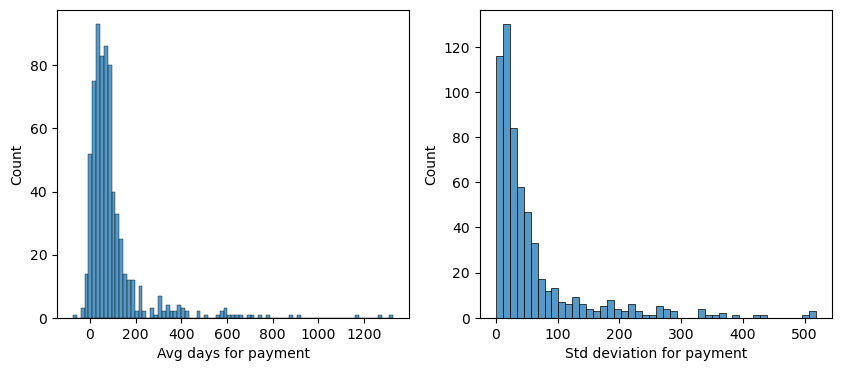

In [129]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

- From the above plots the data is not normalized at all, hence we need to do the scaling.

### Scaling

In [131]:
scaler=StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

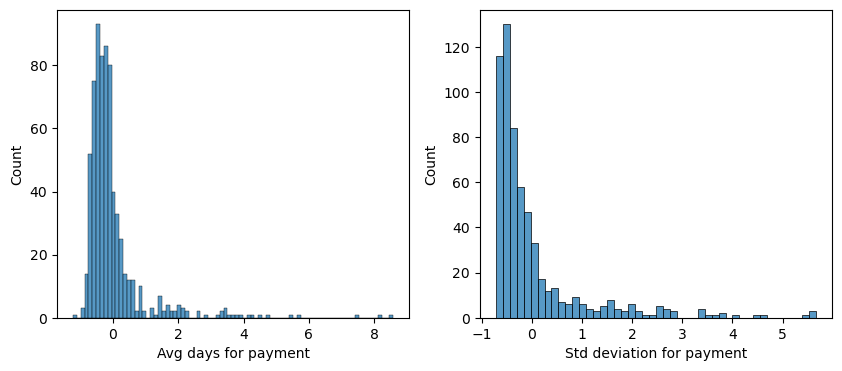

In [133]:
# Visualising the data again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

In [135]:
# Resetting the index
cust_seg.reset_index(inplace=True)

# Checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [137]:
# Replacing the null values for Std deviation for payment with 0
cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [139]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [141]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head(2)

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042


#### Clustering

In [143]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[ 1.85344423,  3.33339499],
       [-0.3019069 , -0.32884213],
       [ 4.66736808,  0.44512922],
       [ 0.42465258,  0.94746544]])

In [145]:
# Finding optimal number of clusters

# silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557759850933303
For n_clusters=3, the silhouette score is 0.7491797445652646
For n_clusters=4, the silhouette score is 0.6097388985555847
For n_clusters=5, the silhouette score is 0.6173540681033151
For n_clusters=6, the silhouette score is 0.3980238443005479
For n_clusters=7, the silhouette score is 0.40126283759200904
For n_clusters=8, the silhouette score is 0.41457849738995217


- From the above results, we can see that for 3 clusters, the silhouette score looks good. Hence selecting n_clusters as 3.

In [147]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [149]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [151]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head(2)

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,1
1,6TH Corp,-0.420640,-0.626042,1


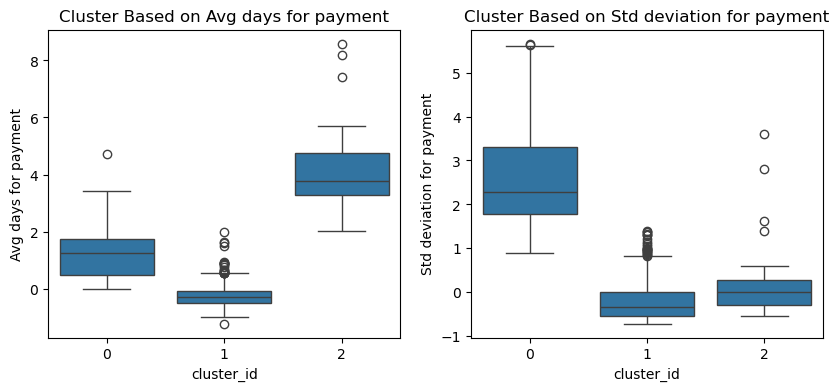

In [153]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

- '1' Cluster -- Prolonged Invoice Payment

- '2' Cluster -- Early Invoice Payment

- '0' Cluster -- Medium Invoice Payment

In [155]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [157]:
# Creating a copy
cust_dict = cust_seg.copy()

In [159]:
# Renaming the column
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [161]:
# Setting the 'Customer_Name' as index
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

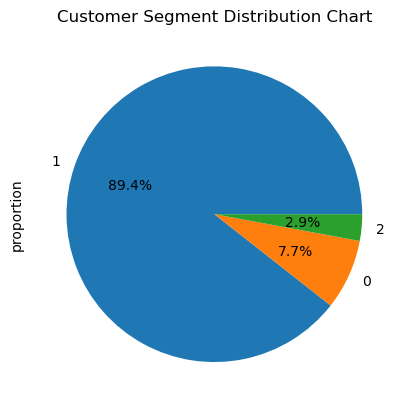

In [163]:
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Distribution Chart")

- We can see that invoices which are due in prolonged time frane are the ones which are open and the company needs to take an action to close them asap.

In [165]:
# Merging rec_pay_data and cust_deg to add clustering index
merged_df = pd.merge(rec_pay_data, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head(2)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,...,0,0,0,0,0,0,0,1,169,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,...,0,0,0,0,0,0,0,1,33,1


In [167]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

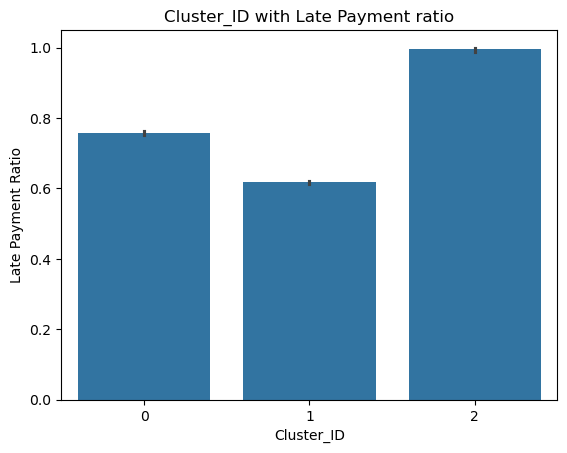

In [169]:
sns.barplot(data=merged_df, x='cluster_id', y='default', estimator=np.mean)
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

# Step 6 : Data Handling for Model building & Train-Test Split

In [171]:
# Creating a new dataframe with important variables for model building
reg_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]

reg_df.head(2)

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.63040,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,48990.21133,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [173]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
reg_df['Invoice_Month'] = reg_df['INVOICE_CREATION_DATE'].dt.month
reg_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg_df.head(2)

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12


In [175]:
reg_df.shape

(92811, 16)

In [177]:
# Open Invoice dataset


open_reg_df = open_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
open_reg_df.head(2)

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-18


In [179]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_reg_df['Invoice_Month'] = open_reg_df['INV_CREATION_DATE'].dt.month
open_reg_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_reg_df.head(2)

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3


In [181]:
# Creating Due_Month column and dropping Due Date
open_reg_df['Due_Month'] = open_reg_df['Due Date'].dt.month
open_reg_df.drop('Due Date',axis=1,inplace= True)
open_reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [183]:
# Checking columns for both datasets
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [185]:
open_reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

### Train-Test Split

In [187]:
# Feature variables X
X = reg_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,0,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12


In [189]:
# Target variable y
y = merged_df['default']
y.head(2)

0    1
1    1
Name: default, dtype: int32

In [191]:
# Splitting into train and test set

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head(2)

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,10110.77468,0,1,0,0,0,0,0,0,0,0,0,1,0,1,5
29115,20469.08000,0,0,0,0,0,0,1,0,0,0,0,1,0,1,4


In [193]:
X_train.shape

(64967, 16)

In [195]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head(2)

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,-0.553331,0,1,0,0,0,0,0,0,0,0,0,1,0,1,5
29115,-0.542467,0,0,0,0,0,0,1,0,0,0,0,1,0,1,4


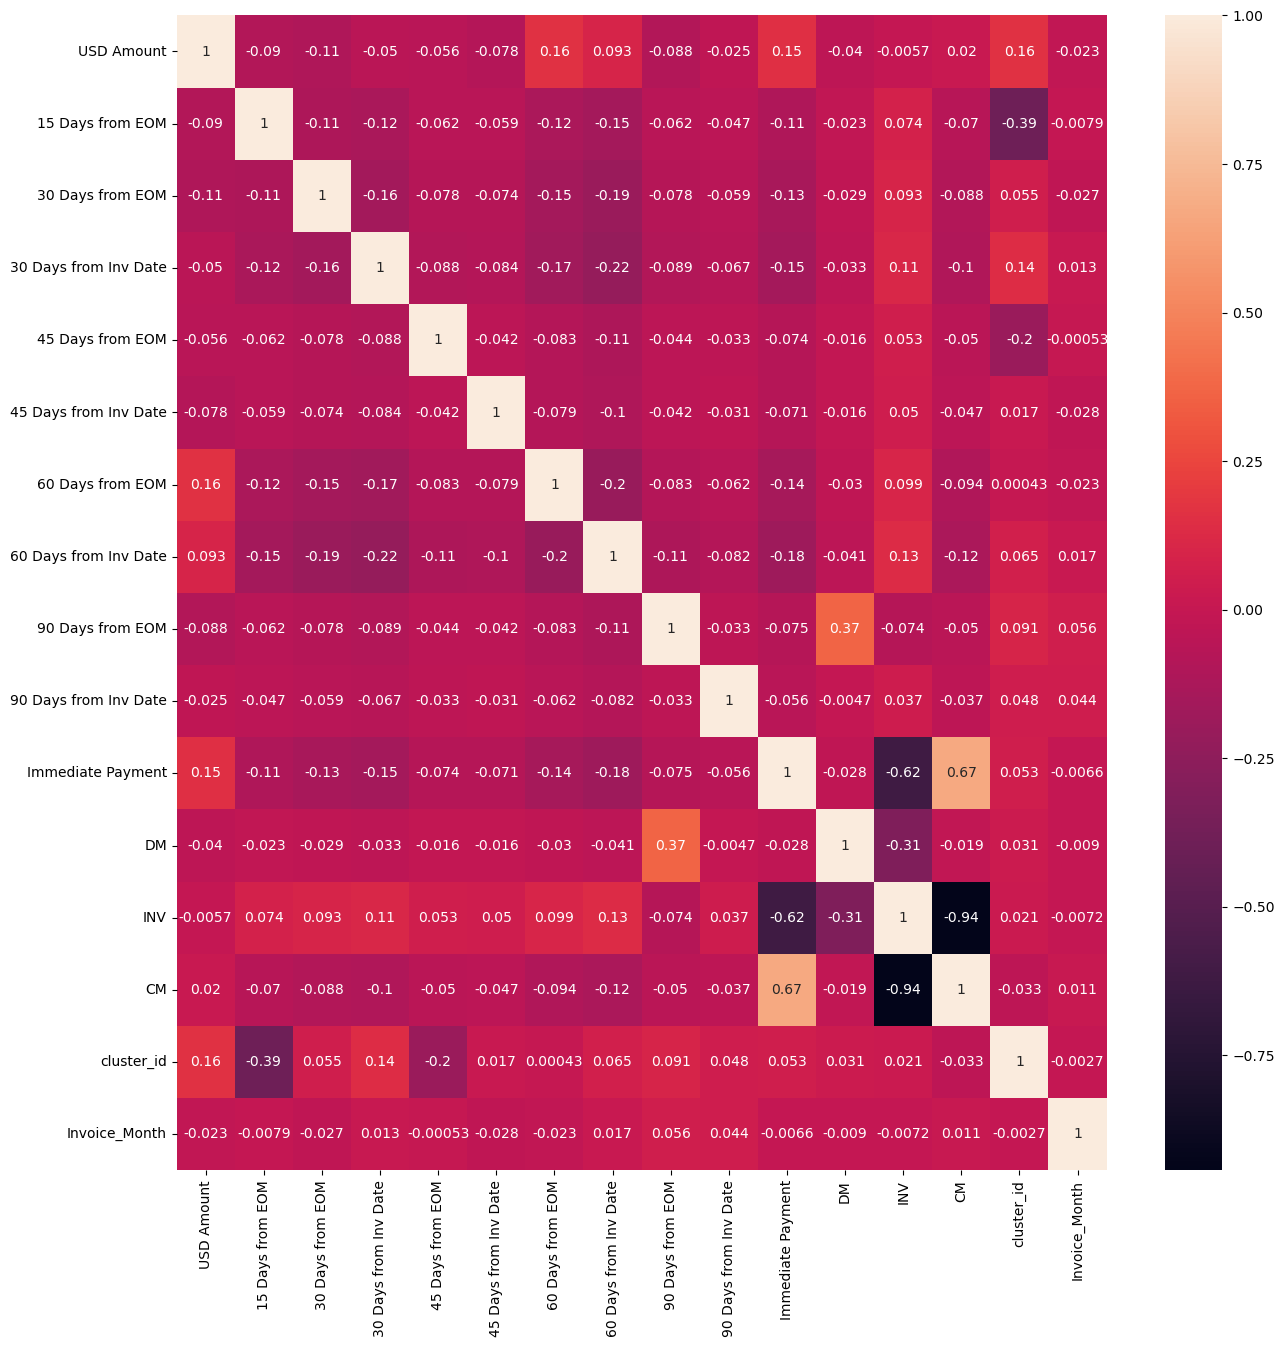

In [197]:
# Plotting heat map of X_train dataset to understand the distribution

plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

- CM & INV, INV & Immediate Payment, DM & 90 days from EOM has high multicollinearity, therefore dropping these columns to clean the dataset

In [199]:
X_train.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)

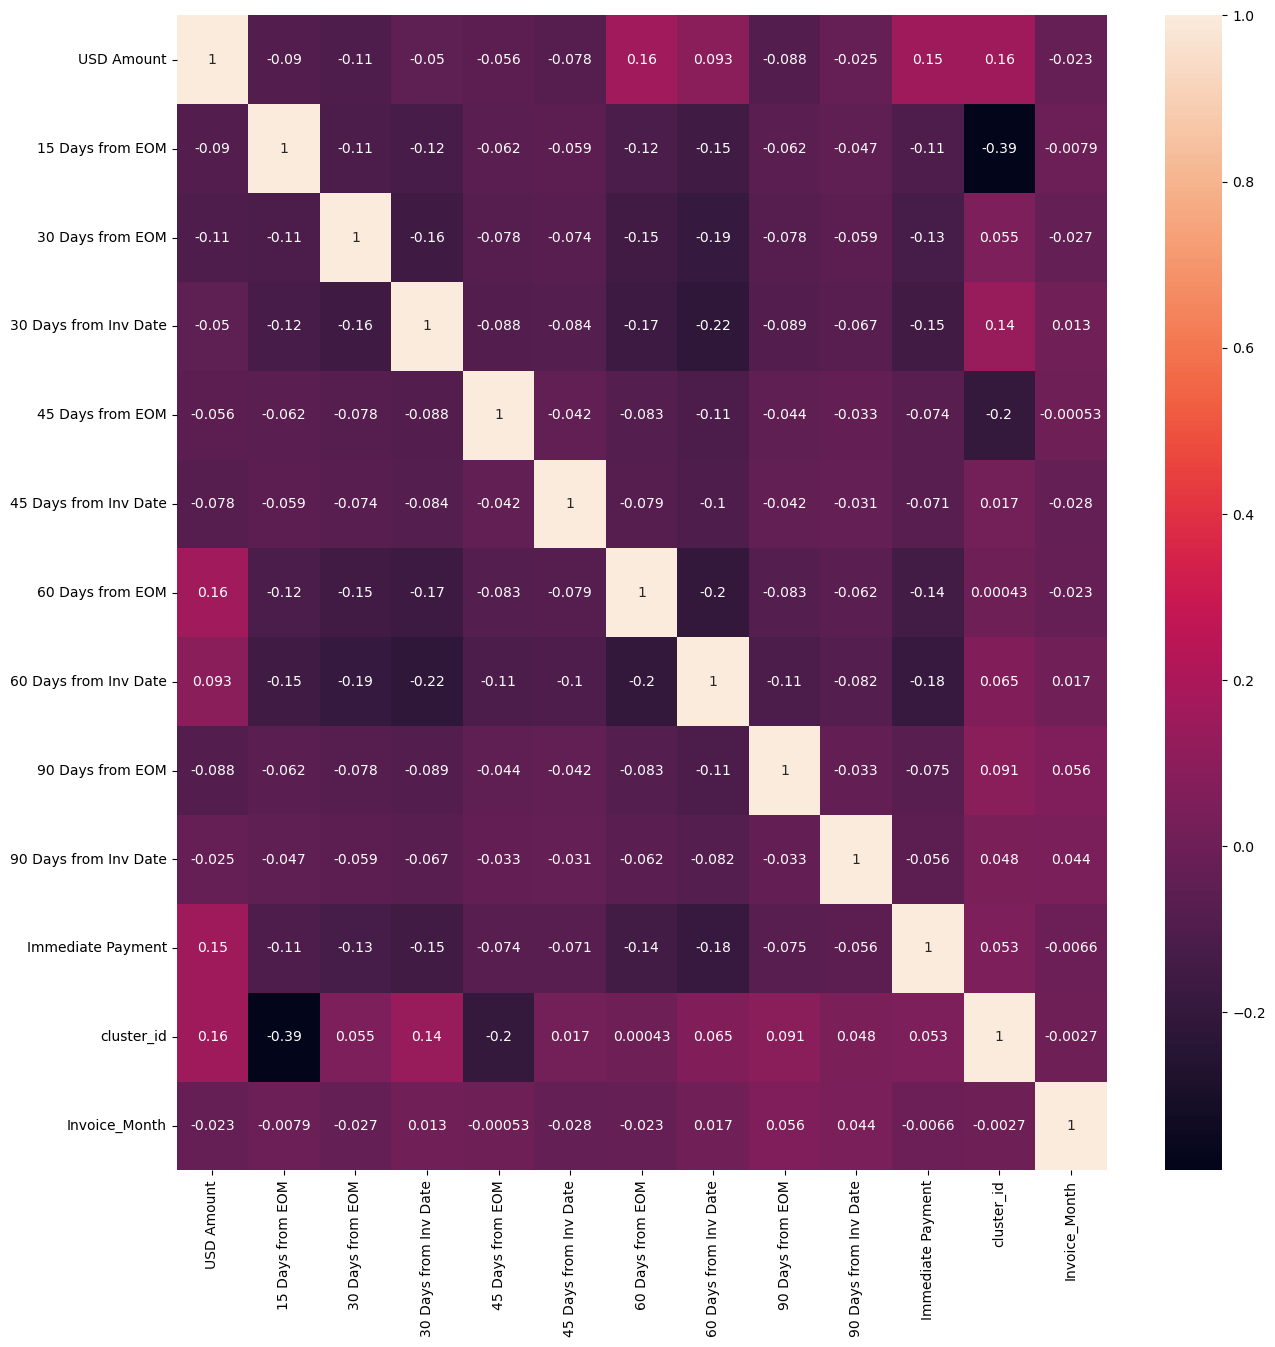

In [201]:
# Plotting heat map of X_train dataset again to visualise

plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

- Now the data seems clean as there is no high multicollinearity. Let us finally move on with the Model Bulding! 

# Step 7 : Multiple Model Building,Testing and Predicting

### 1st Model - Logistic Regression

In [203]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64953
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30146.
Date:                Sat, 30 Nov 2024   Deviance:                       60292.
Time:                        19:53:55   Pearson chi2:                 6.29e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3018
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9566      0.052     18.559      0.000       0.856       1.058
USD Amount               -0.0342      0.012     -2.858      0.004      -0.058      -0.011
15 Days from EOM          2.4735      0.107     23.119      0.000       2.264       2.683
30 Days from EOM         -2.3400      0.053    -44.426      0.000      -2.443      -2.237
30 Days from Inv Date     0.2516      0.052      4.877      0.000       0.150       0.353
45 Days from EOM          0.3050      0.070      4.382      0.000       0.169       0.441
45 Days from Inv Date    -0.3133      0.063     -4.991      0.000      -0.436      -0.190
60 Days from EOM         -2.1698      0.052    -41.409      0.000      -2.272      -2.067
60 Days from Inv Date    -0.1936      0.049     -3.915      0.000      -0.291      -0.097
90 Days from EOM         -0.5079      0.061     -8.326      0.000      -0.627      -0.388
90 Days from Inv Date    -1.0336      0.069    -15.044      0.000      -1.168      -0.899
Immediate Payment         3.0961      0.104     29.705      0.000       2.892       3.300
cluster_id               -0.4368      0.026    -16.931      0.000      -0.487      -0.386
Invoice_Month             0.0952      0.003     37.574      0.000       0.090       0.100
=========================================================================================
"""

### Checking VIF

In [205]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cluster_id,4.08
12,Invoice_Month,2.66
7,60 Days from Inv Date,2.01
3,30 Days from Inv Date,1.85
2,30 Days from EOM,1.58
6,60 Days from EOM,1.57
10,Immediate Payment,1.54
8,90 Days from EOM,1.29
5,45 Days from Inv Date,1.17
9,90 Days from Inv Date,1.15


- Considering both the VIF and the p-values are in ideal range, we can go ahead with this model ! 

In [207]:
# Predicted values for train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

52625    0.209960
29115    0.673845
80920    0.763726
55019    0.374863
82266    0.814366
16093    0.991638
54916    0.374863
15532    0.207595
2618     0.810537
79771    0.624812
dtype: float64

In [209]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20995955, 0.6738448 , 0.76372636, 0.37486271, 0.81436605,
       0.99163782, 0.37486271, 0.20759496, 0.8105375 , 0.62481234])

In [211]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'default':y_train.values, 'default_pred':y_train_pred})
y_pred.head(2)

,default,default_pred
0,0,0.209960
1,0,0.673845


In [213]:
# Making the prediction based on 0.5 cutoff

y_pred['logreg_pred'] = y_pred['default_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head(2)

,default,default_pred,logreg_pred
0,0,0.209960,0
1,0,0.673845,1


### Understanding the confusion matrix

In [215]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.default, y_pred.logreg_pred)
confusion

array([[12815,  9534],
       [ 4453, 38165]], dtype=int64)

In [217]:
# Accuracy
print(accuracy_score(y_pred.default, y_pred.logreg_pred))

0.7847060815490942


So 78.4% is our train dataset accuracy, which is a good number honestly.

In [219]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [221]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8955136327373411

In [223]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.5734037317105911

In [225]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.42659626828940894


In [227]:
# positive predictive value 
print (TP / float(TP+FP))

0.8001215958405836


In [229]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7421241602965022


In [231]:
### Finding the optimum cut off point 

for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,0,0.209960,0,1,1,0,0,0,0,0,0,0
1,0,0.673845,1,1,1,1,1,1,1,0,0,0
2,1,0.763726,1,1,1,1,1,1,1,1,0,0
3,1,0.374863,0,1,1,1,0,0,0,0,0,0
4,0,0.814366,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64962,0,0.727069,1,1,1,1,1,1,1,1,0,0
64963,1,0.173788,0,1,0,0,0,0,0,0,0,0
64964,1,0.906623,1,1,1,1,1,1,1,1,1,1
64965,1,0.910813,1,1,1,1,1,1,1,1,1,1


In [233]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.655995  1.000000  0.000000
0.2   0.2  0.728924  0.976090  0.257595
0.3   0.3  0.767682  0.947745  0.424314
0.4   0.4  0.782551  0.911047  0.537518
0.5   0.5  0.784706  0.895514  0.573404
0.6   0.6  0.774039  0.864142  0.602219
0.7   0.7  0.730294  0.713173  0.762942
0.8   0.8  0.648422  0.498052  0.935165
0.9   0.9  0.540367  0.305364  0.988501


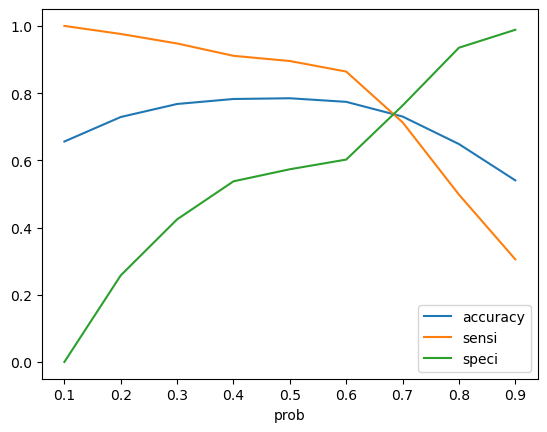

In [235]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.6 is the optimum point to take it as a cutoff probability for final prediction.

In [237]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head(2)

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,0,0.209960,0,1,1,0,0,0,0,0,0,0,0
1,0,0.673845,1,1,1,1,1,1,1,0,0,0,1


In [239]:
# Let's check the overall accuracy.
accuracy_score(y_pred.default, y_pred.final_predicted)

0.7740391275570674

In [241]:
# Precision Score
precision_score(y_pred.default, y_pred.final_predicted)

0.8055470493022442

In [243]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8641419118682246

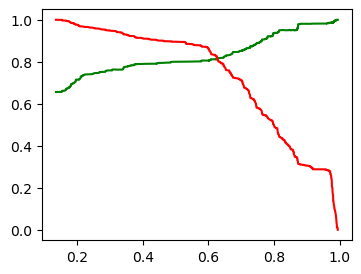

In [245]:
# Lets find out the find the precision-recall threshold and plot the same

p, r, thresholds = precision_recall_curve(y_pred.default, y_pred.default_pred)

plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

On Precision & Recall trade off it is found that optimal cutoff of near to 0.6. So, we are keeping the optimum cutoff 0.6.

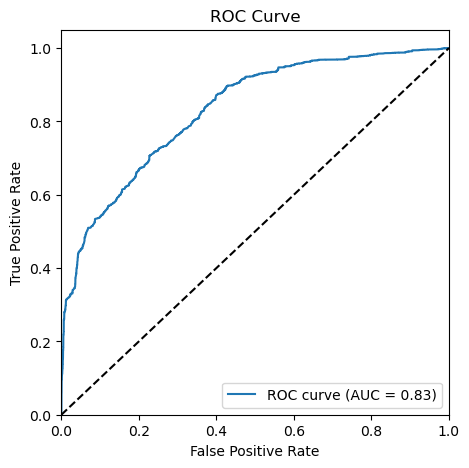

In [247]:
def draw_roc(actual, probs):
    fpr, tpr, _ = roc_curve(actual, probs)
    auc_score = roc_auc_score(actual, probs)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Calling the function directly
draw_roc(y_pred.default, y_pred.default_pred)

- The AUC score seems really good and ideally acceptable. So we would move ahead and make predictions on the test set to check the model workability

### Predicting the train set on the test set

In [249]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head(2)

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,cluster_id,Invoice_Month
12743,-0.545664,0,0,0,0,0,1,0,0,0,0,1,3
75338,-0.468936,0,0,0,0,0,0,1,0,0,0,0,8


In [251]:
# Predicting

y_test_pred = res.predict(sm.add_constant(X_test))

In [253]:
y_test_pred[:10]

12743    0.206578
75338    0.823595
39614    0.983783
52529    0.210007
47001    0.264681
90315    0.153713
28144    0.860252
29929    0.703567
80190    0.745296
1736     0.796665
dtype: float64

In [255]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [257]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [259]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [261]:
y_test_df.head(2)

,default,CustID
12743,0,12743
75338,1,75338


In [263]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [265]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [267]:
y_pred_final.head(2)

,default,CustID,0
0,0,12743,0.206578
1,1,75338,0.823595


In [269]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob','target':'Delay'})

In [271]:
# Let's see the head of y_pred_final
y_pred_final.head(2)

,default,CustID,Delay_Prob
0,0,12743,0.206578
1,1,75338,0.823595


In [273]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)
y_pred_final.head(2)

,default,CustID,Delay_Prob,final_predicted
0,0,12743,0.206578,0
1,1,75338,0.823595,1


In [275]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.default, y_pred_final.final_predicted)

0.7758583536848154

In [277]:
#precision score
precision_score(y_pred_final.default, y_pred_final.final_predicted)

0.8077275971046998

In [279]:
# Recall Score
recall_score(y_pred.default, y_pred.final_predicted)

0.8641419118682246

- So our test accuracy is 77.5% and train accurancy is 78.4%. We can conclude that model is performing consistently on both the training and testing datasets

### 2nd Model - Random Forest

In [282]:
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [284]:
# creating X and y
X= reg_df
y= merged_df['default']

In [286]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [288]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [290]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [292]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     22349
           1       0.96      0.98      0.97     42618

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.9580864131020365


In [294]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Perform cross-validation and compute mean and standard deviation of recall scores
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring='recall')
print(f"Mean score: {scores.mean():.2f}, Standard deviation: {scores.std():.2f}")

Mean score: 0.95, Standard deviation: 0.00


In [295]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [298]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9529
           1       0.93      0.96      0.94     18315

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844

Accuracy is :  0.9217066513431978


In [340]:
# Parameter Grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
}

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV with fewer iterations and lower cv
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    scoring='f1', 
    cv=3, 
    n_iter=10,  # Number of random combinations to try
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters and Model Evaluation
print("Best hyperparameters:", random_search.best_params_)
print("Best f1 score:", random_search.best_score_)

# Best Model Predictions
best_rf = random_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

# Classification Report
print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best f1 score: 0.9302946739938257
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     22349
           1       0.93      0.97      0.95     42618

    accuracy                           0.94     64967
   macro avg       0.94      0.92      0.93     64967
weighted avg       0.94      0.94      0.93     64967



In [342]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      9529
           1       0.91      0.96      0.94     18315

    accuracy                           0.91     27844
   macro avg       0.91      0.89      0.90     27844
weighted avg       0.91      0.91      0.91     27844



- From the above classification report, it can be seen that the f1-score for train and test set is 0.93 and 0.90, which implies that this is a good model. Hence moving forward with this as final model for prediction.

### Feature Importance

In [346]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.429)
2. Invoice_Month (0.145)
3. 30 Days from EOM (0.127)
4. 60 Days from EOM (0.116)
5. Immediate Payment (0.050)
6. 15 Days from EOM (0.035)
7. cluster_id (0.030)
8. 60 Days from Inv Date (0.015)
9. 30 Days from Inv Date (0.015)
10. 90 Days from Inv Date (0.008)
11. 90 Days from EOM (0.008)
12. INV (0.008)
13. 45 Days from EOM (0.006)
14. 45 Days from Inv Date (0.004)
15. CM (0.004)
16. DM (0.001)


- We can see that the accurancy score is good. So moving on with this model!

### Preparing Open Invoice dataset for prediction

The open invoice data has a column 'AGE' which is calculated by taking the difference between Transaction Date and AS_OF_DATE. A positive value in the AGE column clearly indicates that the payment is already overdue.So, there is nothing to predict. But, a negative value in the AGE column means that the due date is yet to be crossed. Hence, the model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [300]:
# Selecting rows with negative age value for prediction
open_reg_df_age = open_data[open_data['AGE'] < 0]
open_reg_df_age.head(2)

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [302]:
open_reg_df_age = pd.merge(open_reg_df_age, cust_dict, how='left', on='Customer_Name')

In [304]:
# Null counts
round(open_reg_df_age.isna().sum()/len(open_reg_df_age.index), 4)

Customer_Name            0.0000
Due Date                 0.0000
AGE                      0.0000
USD Amount               0.0000
INV_CREATION_DATE        0.0000
15 Days from EOM         0.0000
30 Days from EOM         0.0000
30 Days from Inv Date    0.0000
45 Days from EOM         0.0000
45 Days from Inv Date    0.0000
60 Days from EOM         0.0000
60 Days from Inv Date    0.0000
90 Days from EOM         0.0000
90 Days from Inv Date    0.0000
Immediate Payment        0.0000
DM                       0.0000
INV                      0.0000
CM                       0.0000
cluster_id               0.0278
dtype: float64

- cluster_id has 2.7 % null value counts, hence removing the null values for better model prediction as these null values are of new customers whose data is not present in the 'Received Payment data'.

In [307]:
# Dropping the rows containing null values
open_reg_df_age.dropna(axis=0, inplace=True)

In [309]:
open_reg_df_age.shape

(27269, 19)

In [311]:
open_reg_df_age.head(2)

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0


In [313]:
open_reg_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27269 entries, 0 to 28049
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27269 non-null  object        
 1   Due Date               27269 non-null  datetime64[ns]
 2   AGE                    27269 non-null  int64         
 3   USD Amount             27269 non-null  int32         
 4   INV_CREATION_DATE      27269 non-null  datetime64[ns]
 5   15 Days from EOM       27269 non-null  int32         
 6   30 Days from EOM       27269 non-null  int32         
 7   30 Days from Inv Date  27269 non-null  int32         
 8   45 Days from EOM       27269 non-null  int32         
 9   45 Days from Inv Date  27269 non-null  int32         
 10  60 Days from EOM       27269 non-null  int32         
 11  60 Days from Inv Date  27269 non-null  int32         
 12  90 Days from EOM       27269 non-null  int32         
 13  90 Day

In [315]:
# converting the cluster_id column to int
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype(int)

In [317]:
# Checking the head after adding 'cluster_id' column
open_reg_df_age.head(2)

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [319]:
# Creating a copy of open_reg_df_age for final prediction
open_reg_df_final = open_reg_df_age.copy()

In [321]:
# Dropping Customer_Name and AGE column
open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [323]:
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month # Extracting Month

In [325]:
# dropping due_date and invoice creation date

open_reg_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [348]:
# Checking the columns in the dataset
open_reg_df_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

### Final Predictions

In [350]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

array([0.83913492, 0.59724469, 0.5291199 , ..., 0.87308348, 0.91115056,
       0.60391804])

In [352]:
# Adding the predicted values to the dataframe
open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head(2)

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0.839135
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.597245


In [356]:
# Customer-wise model prediction

open_reg_df_age['Pred_rf'] = pd.to_numeric(open_reg_df_age['Pred_rf'], errors='coerce')

# Group by 'Customer_Name' and compute the product of 'Pred_rf'
customer_seg_prob = open_reg_df_age.groupby('Customer_Name')['Pred_rf'].prod().round(4)

# Convert to DataFrame
customer_seg_prob = customer_seg_prob.reset_index()

print(customer_seg_prob)

    Customer_Name  Pred_rf
0       3D D Corp   0.0000
1       6TH  Corp   0.1332
2       ABDU Corp   0.0000
3       ABEE Corp   0.1747
4       ABU  Corp   0.0203
..            ...      ...
391     XPRE Corp   0.0000
392     YOUG Corp   0.6311
393     YOUS Corp   0.0000
394     ZAHR Corp   0.0017
395     ZAIN Corp   0.2529

[396 rows x 2 columns]


In [358]:
# Taking 0.6 as cut off value
open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [360]:
# Let us check our final dataframe with predictions
open_reg_df_age.head(2)

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0.839135,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0.597245,0


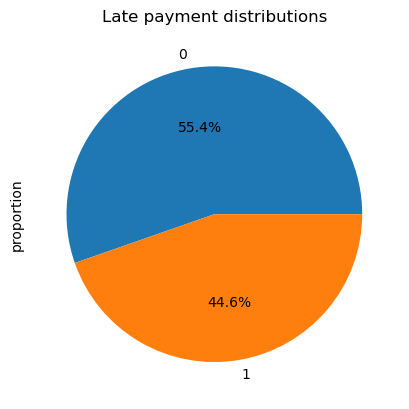

In [362]:
(open_reg_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

- #### From the above pie chart, we can observe that 55.4% of payments in the open invoice data with AGE value negative, i.e. when the due date not crossed.

# Step 8 : Summary of prediction on Customers_name and Visualization

In [371]:
# Checking Customers with our target variable_delayed
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [373]:
# Checking Customers for total invoice counts
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [375]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [377]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [379]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [381]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,2971,8260,35.97
FITR Corp,1015,3454,29.39
PARF Corp,1180,1717,68.72
AREE Corp,956,1118,85.51
ALLI Corp,251,1043,24.07
...,...,...,...
SONO Corp,0,1,0.00
ARMA Corp,0,1,0.00
AISH Corp,0,1,0.00


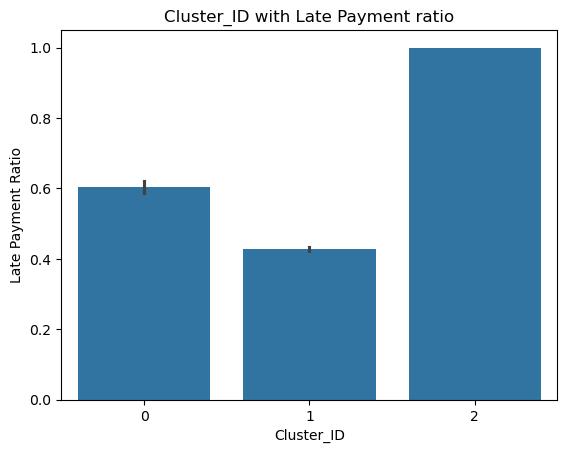

In [383]:
sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean)
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()
#cluster ID 2 has significantly higher ratio of default than clusters 0 and 1

In [385]:
# Finding top 10 customers with highest delay rates

Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) 

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
IL G Corp,13,13,100.0
SOFI Corp,11,11,100.0
HUDA Corp,8,8,100.0
SHIS Corp,8,8,100.0
ALSU Corp,7,7,100.0
RABA Corp,6,6,100.0
TAME Corp,6,6,100.0
SILS Corp,5,5,100.0
V PE Corp,4,4,100.0


# Step 9 : Conclusion/Recomendation

### Recommendations for Payment Collection Policies and Customer Segmentation

- Invoice Class Policies:
Credit Note Payments exhibit the highest delay rates compared to Debit Note or Invoice-type payments. It is recommended that the company implement stricter payment collection policies for such invoice classes to mitigate delays and improve cash flow efficiency.

- Goods vs. Non-Goods Invoices:
Invoices for goods have significantly higher payment delay rates than those for non-goods. To address this, stricter payment policies should be enforced for goods-related invoices to reduce delay instances.

- Low-Value Payments:
A significant portion of transactions involve lower payment amounts, which also show higher delay rates. The company should prioritize these transactions by introducing penalties for late payments. For example, penalties could be applied as a percentage of the billing amount, with higher penalty rates for smaller invoices. This policy should, however, be considered as a last resort.

- Customer Segmentation Insights:
Customers were segmented into three clusters:

   - Cluster 0: Medium payment duration
   - Cluster 1: Prolonged payment duration
  Cluster 2: Early payment duration
Customers in Cluster 1 (prolonged payment duration) demonstrated significantly higher delay rates compared to other clusters. It is recommended that the company prioritize focused attention and customized engagement strategies for Cluster 1 customers to reduce delay rates.

- High-Probability Customers:
Companies or customers with the highest probability of delay, as well as those with substantial total and delayed payment counts, should be prioritized. These customers represent a significant risk to timely payment collection and require dedicated follow-up and tailored policies to ensure compliance.